<a href="https://colab.research.google.com/github/yeahginny/Machine_learning/blob/main/0824_DeepLearning(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
# 데이터 로딩
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

In [26]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
# 데이터 분할
x = data.iloc[:, :-1]

In [28]:
y = data.iloc[:, -1]

In [29]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
X_train

,preg,plas,pres,skin,test,mass,pedi,age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [32]:
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

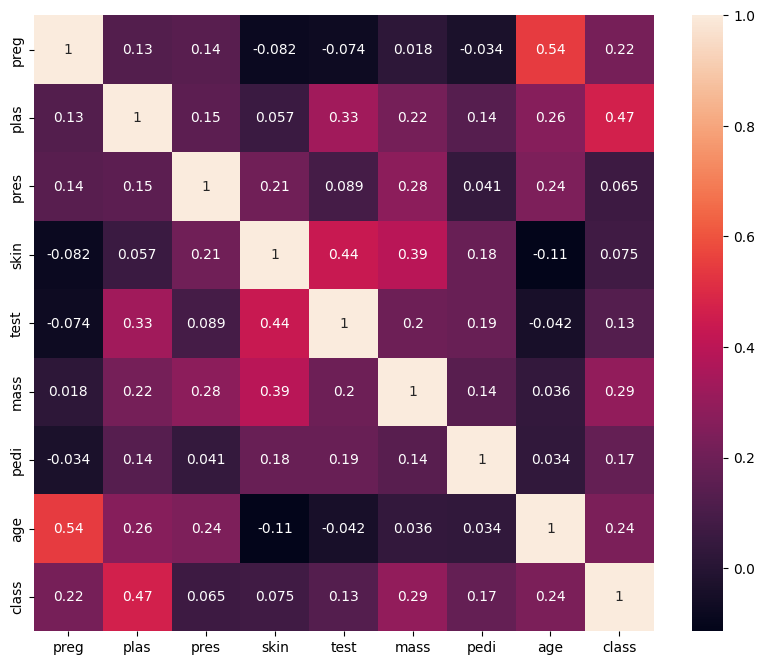

In [34]:
# 상관관계 행렬
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [35]:
from keras.models import Sequential
from keras.layers import Dense

In [36]:
# 모델 구성

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
# 모델 컴파일

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# 모델 학습

model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 2s 3ms/step - loss: 0.6693 - accuracy: 0.6254
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7117
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7410
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.7557
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7638
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7655
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7687
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7720
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7769
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7752
Epoch 11/

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [41]:
import numpy as np

In [42]:
# 첫 번째 레이어의 가중치 추출
weights = model.layers[0].get_weights()[0]

In [43]:
# 각 입력 변수에 대한 중요도 계산
importances = np.mean(np.abs(weights), axis=1)

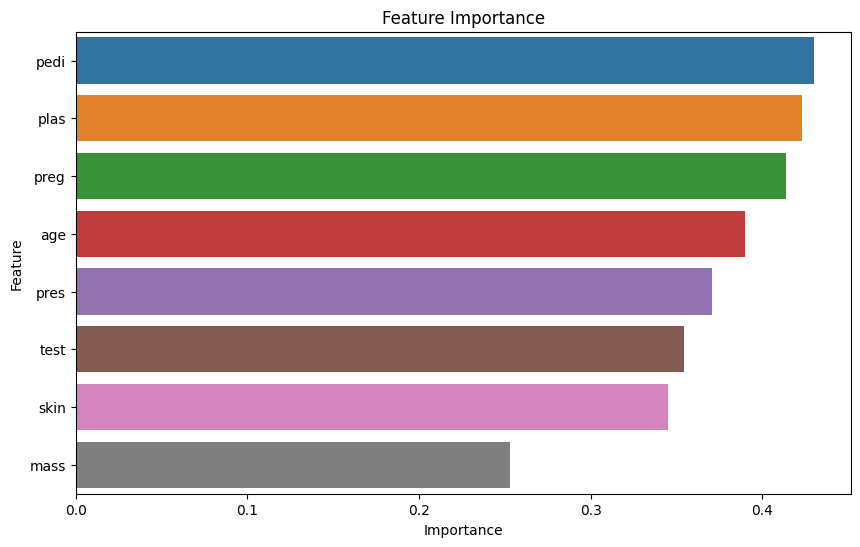

,Feature,Importance
6,pedi,0.429876
1,plas,0.423220
0,preg,0.413493
7,age,0.390000
2,pres,0.370665
4,test,0.354443
3,skin,0.345091
5,mass,0.253060


In [44]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'],
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame and plot the importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

importance_df

In [45]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

5/5 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.7338
Test Accuracy: 73.38%


In [46]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [47]:
# 데이터 로딩
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [48]:
# 데이터 전처리
X = data.drop('species', axis=1)
y = data['species']

In [49]:
# 원-핫 인코딩
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [51]:
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

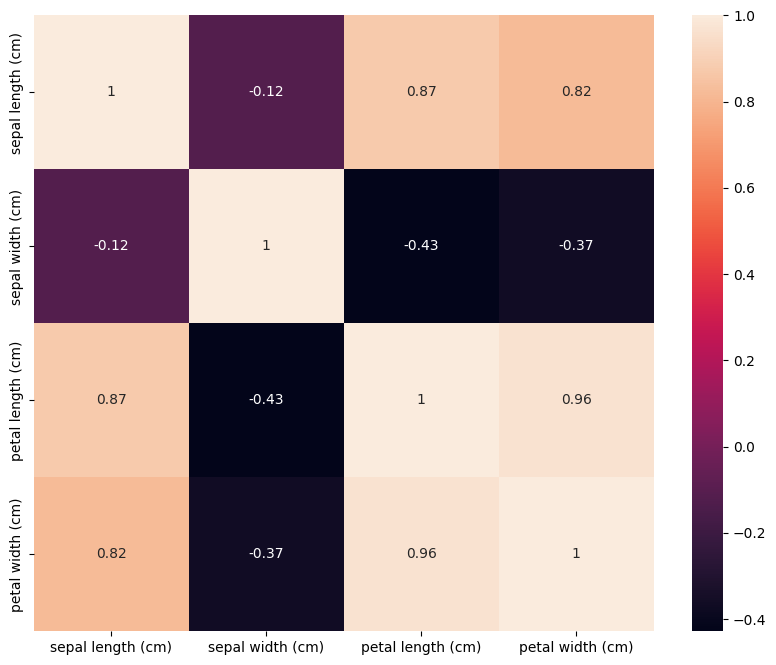

In [53]:
# 상관관계 행렬
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [54]:
# 모델 구성
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3개의 클래스이므로 3개의 출력 뉴런

In [55]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# 모델 학습
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
12/12 [==============================] - 2s 3ms/step - loss: 1.0499 - accuracy: 0.6500
Epoch 2/150
12/12 [==============================] - 0s 3ms/step - loss: 0.9924 - accuracy: 0.6583
Epoch 3/150
12/12 [==============================] - 0s 3ms/step - loss: 0.9422 - accuracy: 0.6500
Epoch 4/150
12/12 [==============================] - 0s 3ms/step - loss: 0.8913 - accuracy: 0.6500
Epoch 5/150
12/12 [==============================] - 0s 3ms/step - loss: 0.8432 - accuracy: 0.6583
Epoch 6/150
12/12 [==============================] - 0s 4ms/step - loss: 0.7994 - accuracy: 0.6667
Epoch 7/150
12/12 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.6917
Epoch 8/150
12/12 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.7167
Epoch 9/150
12/12 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.7583
Epoch 10/150
12/12 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.7583
Epoch 11/

In [57]:
# 첫 번째 레이어의 가중치 추출
weights = model.layers[0].get_weights()[0]

In [58]:
# 각 입력 변수에 대한 중요도 계산
importances = np.mean(np.abs(weights), axis=1)

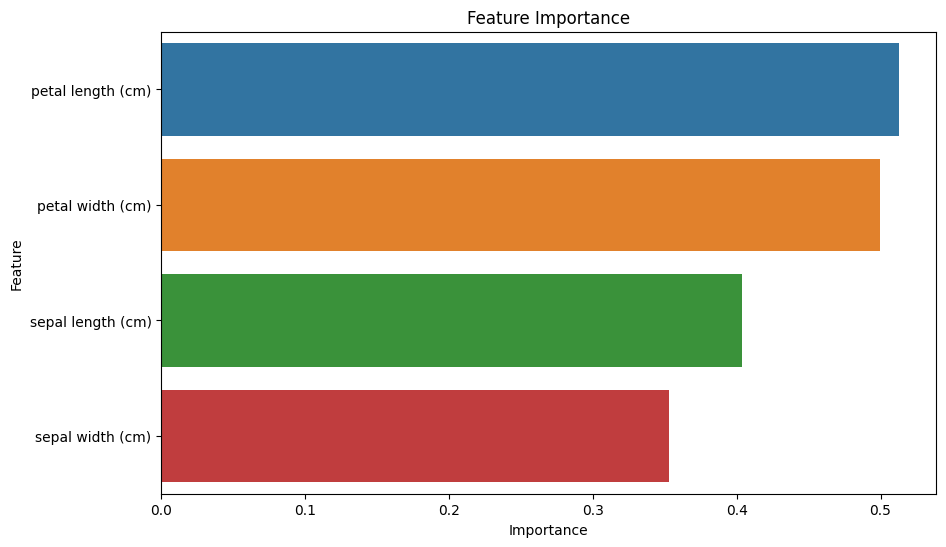

In [59]:
# 중요도 시각화
importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

In [60]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 142ms/step - loss: 0.0302 - accuracy: 1.0000
Test Accuracy: 100.00%
